<center><b><font size='5' color='blue'>DATA BOOTCAMP PROJECT - PET ADOPTION</font></b></center>
<br><br>

<center><b><font size='5'color='red'>OVERVIEW</font></b></center>
<br><br>

Data Scientists for this project: Shimeng Cao (sc6755@stern.nyu.edu), Jiarong Li (jl9175@stern.nyu.edu), and Evan Okin (eo919@stern.nyu.edu)

For our project, we analyzed pet adoption data for cats and dogs. We scoured data science competitions on Kaggle.com to look for a dataset that we were passionate about. We found a competition called "Pet Adoption Speed Prediction" which provides roughly 15,000 rows data for cats and dogs. As people who have adopted pets in the past, we decided that this would be a fun project. In a best case scenario, we might even find enough insights to share with a pet adoption agency to improve the likelihood of pets being adopted. 

To help readers better follow our project, we structured our analysis in below flow：
- Data Exploration and Cleaning
- Regression Analysis
- Machine Learning Algorithms:
1) ML for the regression problem
2) ML for the classification problem

<center><b><font size='5'color='red'>IMPORT PACKAGES</font></b></center>
<br><br>

We start by importing necessary packages and libraries. This will allow us to read in our data, perform operations more fluently on dataframes, and create some beautiful visualizations. Additionally, we will be able to perform regressions and create prediction models using machine learning algorithms.

In [68]:
#Working With DataFrames
import pandas as pd
import numpy as np
#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Regressions and Machine Learning
import statsmodels.formula.api as smf
import patsy
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as reg
from sklearn.linear_model import LogisticRegression as logistic
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split

We saved the data from Kaggle.com Competiton (Pet Adoption Speed Prediction) to our desktops (where we set our working directory to be via terminal, where our jupyter notebook is also set up). Next, we read in the dataset, which we saved as a csv (this is the convention file type for large datasets).

In [4]:
df=pd.read_csv('/Users/jessica.li/Desktop/dataset_final_project.csv')

<center><b><font size='5'color='red'>DATA EXPLORATION AND CLEANING</font></b></center>
<br><br>

The following are the data fields corresponding to our project, which we obtained on Kaggle.com:

PetID - Unique hash ID of pet profile <br>
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.<br>
Type - Type of animal (1 = Dog, 2 = Cat)<br>
Name - Name of pet (Empty if not named)<br>
Age - Age of pet when listed, in months<br>
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)<br>
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)<br>
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)<br>
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)<br>
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)<br>
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)<br>
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)<br>
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)<br>
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)<br>
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)<br>
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)<br>
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)<br>
Quantity - Number of pets represented in profile<br>
Fee - Adoption fee (0 = Free)<br>
State - State location in Malaysia (Refer to StateLabels dictionary)<br>
RescuerID - Unique hash ID of rescuer<br>
VideoAmt - Total uploaded videos for this pet<br>
PhotoAmt - Total uploaded photos for this pet<br>
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

We wanted to explore the data. Ultimately, we wanted to figure out the predictive nature of these variables in determining whether or not we could predict (one way or another) whether a pet would be adopted. At first glance, we saw a variable PetID, which we believed should have no predictive value. On the other hand, the variable Vaccinated is likely to be predictive (before analyzing the data, we believed that a pet that is vaccinated would be more likely to be adopted than a pet that is not vaccinated).

We looked at the first three rows of the dataframe, to make sure that it loaded into python properly.

In [5]:
df.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,Brisco,1,307,0,1.0,2,7,0,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3


We wanted to see how many rows and columns the dataset has.

In [6]:
df.shape

(14993, 24)

The dataset has 14,993 rows and 24 columns. With 24 columns, we have a lot of potential variables to aid in our prediction models.

We wanted to explore the variables.

In [7]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14991.000000,14993.000000,14993.000000,14993.000000,14991.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14992.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457608,10.452078,265.272594,74.009738,1.776132,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259405,41346.028347,0.056760,3.889215,2.516441
std,0.498216,18.155790,60.056818,123.011575,0.681535,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.417131,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In class, we learned that convention is to use lower-case for columns in a dataframe. We clean up the column names per convention before diving into deeper analysis. Consistent headers will make it easier to run regressions as well.

In [8]:
df.columns=[i.lower() for i in df.columns]

Next, we found the amount of null values by column. Null values of a column could be a bad thing - if we find a null value for a column that we care about, we might have to throw out the entire row/datapoint. On the other hand, if the null value is for a variable that is not predictive, it might not matter. In some cases, it will be fine to fill in the data with key statistics such as the mean or mode. Either way, it's important to have a clean dataset.

In [9]:
df.isna().sum()

type                2
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

First, we dealt with "type." This variable tells us if the pet is a dog or a cat. With missing type, we don't know if the data point is a dog or a cat, and therefor we dropped the entire row.

In [10]:
df = df.dropna(subset=['type'])

In [11]:
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

Next we dealt with the null value for "fee." We looked at the distribution:

In [12]:
df['fee'].value_counts().head(5)/len(df['fee'])

0.0      0.844573
50.0     0.031219
100.0    0.027216
200.0    0.014609
150.0    0.010806
Name: fee, dtype: float64

Nearly 85% of the fee values are 0, so we decided to replace null values with the (overwhelmingly popular) mode.

In [13]:
df['fee'].fillna(0,inplace=True)

In [14]:
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 0
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

We decided to remove the variable "name" since it likely has no predictive power and the column has a lot of missing values.

In [15]:
df = df.drop('name',axis=1).dropna()
df.shape

(14977, 23)

In [16]:
df.isna().sum()

type             0
age              0
breed1           0
breed2           0
gender           0
color1           0
color2           0
color3           0
maturitysize     0
furlength        0
vaccinated       0
dewormed         0
sterilized       0
health           0
quantity         0
fee              0
state            0
rescuerid        0
videoamt         0
description      0
petid            0
photoamt         0
adoptionspeed    0
dtype: int64

According to the description, type 1 is a dog and type 2 is a cat. But, we want to see if we could figure that out on our own, by analyzing the description string.

In [17]:
df_type_test=df.loc[df['description'].str.contains('dog'),:]
df_type_test['type'].value_counts()/len(df_type_test)

1.0    0.924496
2.0    0.075504
Name: type, dtype: float64

Over 92% of the description strings that include the string"dog" are type 1! Thus, we would also have concluded that type 1 is a dog.

We found the percentage of the dataset that is dogs vs. cats, and began visualizing.

In [18]:
df['type'].value_counts()/len(df['type'])

1.0    0.542632
2.0    0.457368
Name: type, dtype: float64

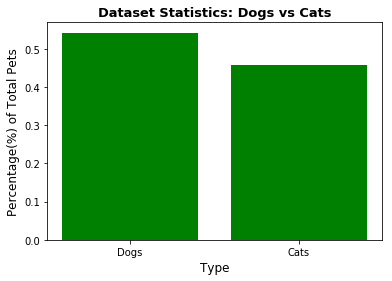

In [19]:
x=['Dogs','Cats']
y=[.542632,.457368]
plt.bar(x,y,color='g')
plt.title('Dataset Statistics: Dogs vs Cats',fontsize=13,fontweight='bold')
plt.xlabel('Type',fontsize=12)
plt.ylabel('Percentage(%) of Total Pets',fontsize=12)
plt.show()

The sad truth is that many pets don't get adopted quickly (or, they don't get adopted at all). We then analyzed pet adoption speed. Since our last plot was a vertical bar chart, we used a horizontal bar chart.

Text(0, 0.5, 'Adoption Rate')

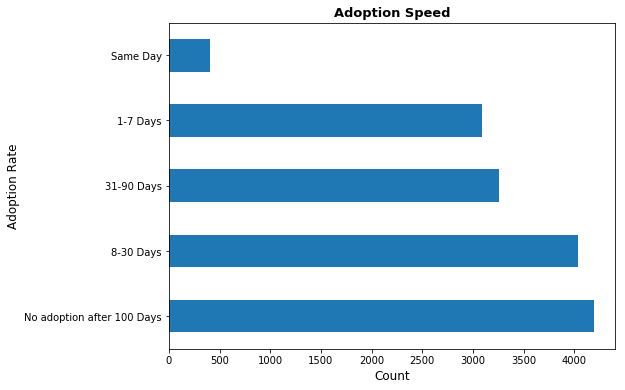

In [20]:
df['adoptionspeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='barh',figsize=(8,6))
plt.title('Adoption Speed', fontsize=13,fontweight='bold')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Adoption Rate',fontsize=12)

We analyzed counts by adoption speed, and found the percentage of pets that have not been adopted after 100 days.

In [21]:
df['adoptionspeed'].value_counts()

4    4193
2    4031
3    3255
1    3088
0     410
Name: adoptionspeed, dtype: int64

In [22]:
round(len(df.loc[df['adoptionspeed']==4])/len(df),2)

0.28

Sadly, nearly 28% of all pets in our dataset were not adopted after 100 days.

We wanted to find out, is the adoption speed better (with a corresponding smaller value) for dogs or cats?

In [23]:
df.groupby(['type']).agg({'adoptionspeed':'mean'})

,adoptionspeed
type,
1.0,2.615233
2.0,2.398978


This data shows us that cats are more likely to be adopted quicker than dogs.

We found that 28% of all pets are not adopted after 100 days. We decided to filter on several characteristics to see if we could deduce some characteristics which help make pets more likely to be adopted. We filtered on pets who possess all of the following characteristics at the same time - are vaccinated, are dewormed, are sterilized, are either healthy or have only a minor injury, have no adoption fee, and age of less than 1 year.

In [24]:
vaccinated_list=[1]
dewormed_list=[1]
sterilized_list=[1]
health_list=[1,2]
fee_list=[0]
age_list=[1,2,3,4,5,6,7,8,9,10,11,12]

df_filter_adj=df.loc[df['vaccinated'].isin(vaccinated_list)&df['dewormed'].isin(dewormed_list)&
       df['sterilized'].isin(sterilized_list)&df['health'].isin(health_list)&
       df['fee'].isin(fee_list)&df['age'].isin(age_list)]
df_filter_adj['adoptionspeed'].value_counts()/len(df_filter_adj)

4    0.398974
3    0.269744
2    0.220513
1    0.087179
0    0.023590
Name: adoptionspeed, dtype: float64

We looked at this in a pie-chart.

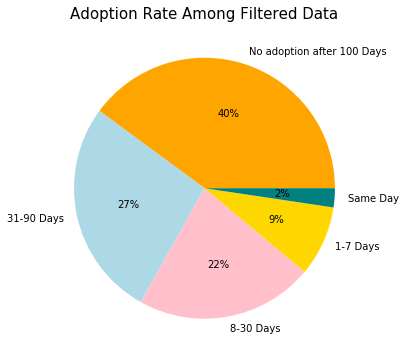

['No adoption after 100 Days',
 '31-90 Days',
 '8-30 Days',
 '1-7 Days',
 'Same Day']

In [25]:
labels=['No adoption after 100 Days','31-90 Days','8-30 Days','1-7 Days','Same Day']
sizes=df_filter_adj['adoptionspeed'].value_counts().values
colors=['orange','lightblue','pink','gold','teal']
explode=[0,0,0,0,0]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct= '%1.0f%%')
plt.title('Adoption Rate Among Filtered Data',fontsize=15)
plt.show()
labels

Or, as a plot.

Text(0, 0.5, 'Distribution')

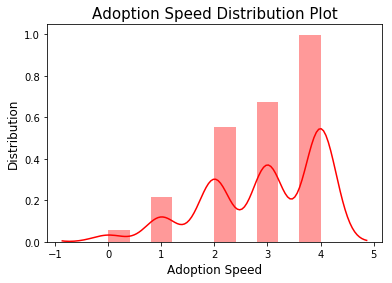

In [26]:
sns.distplot(df_filter_adj['adoptionspeed'],color = "red")
plt.title('Adoption Speed Distribution Plot',fontsize=15)
plt.xlabel('Adoption Speed',fontsize=12)
plt.ylabel('Distribution',fontsize=12)

Surprisingly, 40% of our sliced dataset were not adopted. However, it's possible that with less than 1,000 datapoints for this new dataframe, there's just not enough information for us to draw a conclusion one way or the other. Also, it's possible that the adoption agency does everything they can to make an undesirable adoption pet seem more desirable (such as giving vaccinations).

One of our hypotheses was that a longer description length means that a pet is more likely to be adopted. We created a new column in our dataframe with the character length of the description, and then analyzed that column.

In [27]:
df['description_length']=df['description'].str.len()

In [28]:
np.corrcoef(df['description_length'],-df['adoptionspeed'])[0,1]

0.010236029488048715

There is some positive correlation (approximately 1%), but not enough to be labeled significant. The reason that we took the negative of the column for adoption speed is that a smaller value is "better" than a larger value.

We believed there would be a positive relationship/correlation between whether a pet has been vaccinated and adoption speed.

In [29]:
np.corrcoef(df['vaccinated'],-df['adoptionspeed'])[0,1]

0.059697201203509416

As expected, there is some correlation, although it's smaller than we expected. 

We learned in class how to merge two datasets together. We wanted to merge state name to the original dataframe.

In [31]:
state=pd.read_csv('/Users/jessica.li/Desktop/state_labels.csv')
state = state.rename(columns={'StateID':'state','StateName':'state_name'})
state
df = df.merge(state,
        on='state',
        how = 'left')

With the merged dataframe, we could assess adoption speed by state, using groupby.

Text(0, 0.5, 'Mean Adoption Speed')

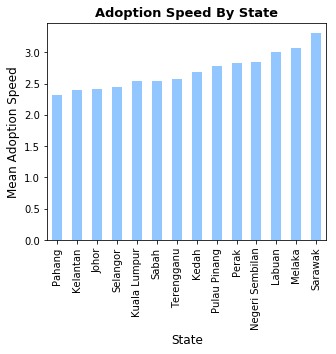

In [32]:
df.groupby('state_name')['adoptionspeed'].mean().sort_values().plot.bar(figsize=(5,4))
plt.title('Adoption Speed By State',fontsize=13,fontweight='bold')
plt.xlabel('State',fontsize=12)
plt.ylabel('Mean Adoption Speed',fontsize=12)

Within all the states, Pahang has the quickiest adoption speed (mean).

We also assessed adoption speed by dog vs. cat within states:

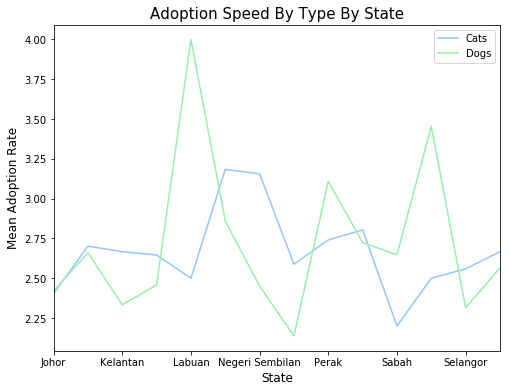

In [33]:
df.loc[df['type']==1,:].groupby('state_name')['adoptionspeed'].mean().plot(figsize=(8,6))
df.loc[df['type']==2,:].groupby('state_name')['adoptionspeed'].mean().plot(figsize=(8,6))
plt.title('Adoption Speed By Type By State',fontsize=15)
plt.xlabel('State',fontsize=12)
plt.ylabel('Mean Adoption Rate',fontsize=12)
plt.legend(['Cats','Dogs'])

Some states have very different preferences for dogs vs cats. For example, Labuan and Sabah have high preference for cats.

We then analyzed the adpotion speed by age for cats and dogs.

In [34]:
df['age_yr']=df['age']/12

In [35]:
df.groupby(['age_yr','type']).agg({'adoptionspeed':'mean'})

adoptionspeed
age_yr    type               
0.000000  1.0        2.166667
          2.0        2.265957
0.083333  1.0        2.314685
          2.0        2.034517
0.166667  1.0        2.423387
          2.0        2.056106
0.250000  1.0        2.618337
          2.0        2.312865
0.333333  1.0        2.842105
          2.0        2.471609
0.416667  1.0        2.837500
          2.0        2.597183
0.500000  1.0        2.964126
          2.0        2.688623
0.583333  1.0        3.008403
          2.0        2.658385
0.666667  1.0        3.038217
          2.0        2.822368
0.750000  1.0        2.797980
          2.0        2.752941
0.833333  1.0        2.828947
          2.0        2.686047
0.916667  1.0        2.902439
          2.0        3.188679
1.000000  1.0        2.927386
          2.0        2.839175
1.083333  1.0        2.478261
          2.0        3.058824
1.166667  1.0        2.733333
          2.0        2.978261
...                       ...
7.666667  1.0        2.000000
          2.0        2.000000
7.916667  1.0        4.000000
8.000000  1.0        2.634146
          2.0        1.800000
8.333333  1.0        2.000000
8.500000  1.0        4.000000
9.000000  1.0        3.000000
          2.0        3.666667
9.333333  1.0        2.000000
          2.0        0.000000
9.750000  1.0        1.000000
10.000000 1.0        2.592593
          2.0        3.833333
10.166667 1.0        4.000000
10.250000 1.0        4.000000
11.000000 1.0        3.000000
          2.0        3.000000
11.250000 1.0        3.000000
12.000000 1.0        3.666667
          2.0        2.000000
12.250000 2.0        1.000000
13.000000 1.0        2.000000
14.000000 1.0        3.000000
15.000000 1.0        4.000000
          2.0        3.000000
17.666667 1.0        4.000000
          2.0        3.000000
19.833333 1.0        4.000000
21.250000 1.0        4.000000

[174 rows x 1 columns]

Text(0, 0.5, 'Adoption Speed')

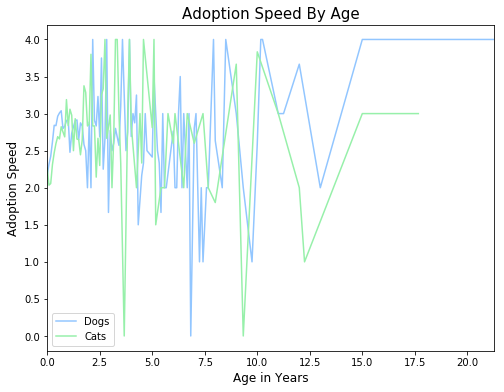

In [36]:
df.loc[df['type']==1,:].groupby('age_yr')['adoptionspeed'].mean().plot(figsize=(8,6))
df.loc[df['type']==2,:].groupby('age_yr')['adoptionspeed'].mean().plot(figsize=(8,6))
plt.title('Adoption Speed By Age',fontsize=15)
plt.legend(['Dogs','Cats'])
plt.xlabel('Age in Years',fontsize=12)
plt.ylabel('Adoption Speed',fontsize=12)

We can see that cats are more likely to be adopted around years 1 and 3, and are adopted quicker than dogs after age 4. Unfortunately dogs have a high chance of not being adopted after year 5.

<center><b><font size='5'color='red'>REGRESSION ANALYSIS</font></b></center>
<br><br>

Before beginning regression analysis, we assessed correlations between variables.

Text(0.5, 1.0, 'Correlation Between All Variables')

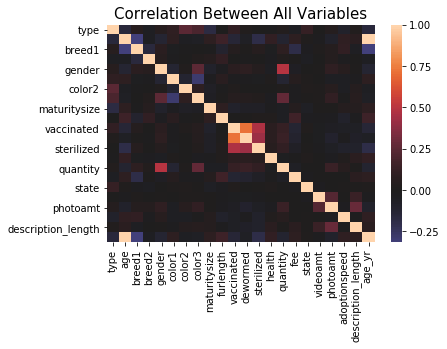

In [37]:
sns.heatmap(df.corr(),center=0,annot=False)
plt.title('Correlation Between All Variables',fontsize=15)

This graphic is clearly too busy, so we show only certain columns.

Text(33.0, 0.5, 'Variable')

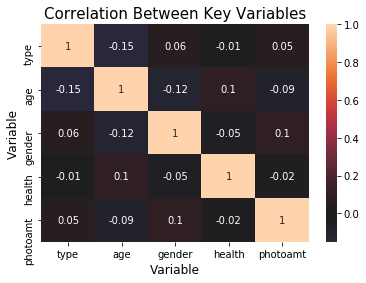

In [38]:
sns.heatmap(round(df[['type','age','gender','health','photoamt']].corr(),2),center=0,annot=True)
plt.title('Correlation Between Key Variables',fontsize=15)
plt.xlabel('Variable',fontsize=12)
plt.ylabel('Variable',fontsize=12)

We ran regressions to see which features contribute to adoption.

In [39]:
reg_type = smf.ols('adoptionspeed ~ type',data=df).fit()
print(reg_type.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     126.4
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           3.23e-29
Time:                        21:01:08   Log-Likelihood:                -23634.
No. Observations:               14977   AIC:                         4.727e+04
Df Residuals:                   14975   BIC:                         4.729e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8315      0.030     95.591      0.0

The regression result shows this model using 'type' as the indepedent variable explains only 0.8% variability of the dependent variable 'adoptionspeed' (R-squared = 0.008). 

The result is statistically siginificantly at either p = 0.05 or p = 0.025.

The coefficient is -0.2156, which means the adoption speed and pet type are slightly negatively related: people tend to adopt cats faster than dogs.

In [37]:
reg_age = smf.ols('adoptionspeed ~ age',data=df).fit()
print(reg_age.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     154.3
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           2.99e-35
Time:                        14:10:57   Log-Likelihood:                -23621.
No. Observations:               14977   AIC:                         4.725e+04
Df Residuals:                   14975   BIC:                         4.726e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4479      0.011    221.620      0.0

Text(0, 0.5, 'Adoption Speed')

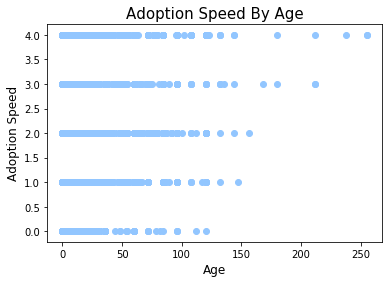

In [38]:
plt.scatter(df['age'], df['adoptionspeed'])
plt.title('Adoption Speed By Age',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Adoption Speed',fontsize=12)

There are different ages (in months) of pets in this dataset. The regression result shows this model using 'age' as the indepedent viarable explains only 1% variability of the dependent variable 'adoptionspeed' (R-squared = 0.010). 

The result is statistically siginificantly at p = 0.05 or p = 0.025.

The coefficient is 0.0065, which means the adoption speed and pet age are positively related: In general, older pets tend to take a bit longer time to adopt.

The plot chart also tells the same story.

In [39]:
reg_breed1 = smf.ols('adoptionspeed ~ breed1',data=df).fit()
print(reg_breed1.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     175.8
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           6.61e-40
Time:                        14:10:57   Log-Likelihood:                -23610.
No. Observations:               14977   AIC:                         4.722e+04
Df Residuals:                   14975   BIC:                         4.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9562      0.043     45.165      0.0

Text(0, 0.5, 'Adoption Speed')

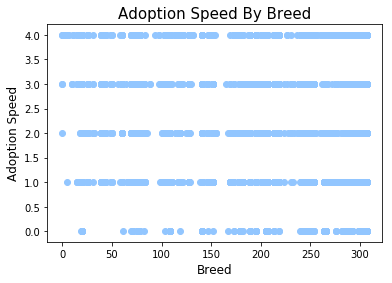

In [40]:
plt.scatter(df['breed1'], df['adoptionspeed'])
plt.title('Adoption Speed By Breed',fontsize=15)
plt.xlabel('Breed',fontsize=12)
plt.ylabel('Adoption Speed',fontsize=12)

There are different primary breeds of pets in this dataset. The regression result shows this model using 'breed1' as the indepedent viarable explains only 1.2% variability of the dependent variable 'adoptionspeed' (R-squared = 0.012). 

The result is statistically siginificantly at p = 0.05 or p = 0.025.

The coefficient is 0.0021, which means the adoption speed and pet age are slightly positively related. Higher code primary breeds tend to take longer time to adopt.

The plot chart also tells the same story.

In [41]:
reg_breed2 = smf.ols('adoptionspeed ~ breed2',data=df).fit()
print(reg_breed2.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.360
Date:                Fri, 05 Jul 2019   Prob (F-statistic):             0.0206
Time:                        14:10:58   Log-Likelihood:                -23695.
No. Observations:               14977   AIC:                         4.739e+04
Df Residuals:                   14975   BIC:                         4.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5297      0.011    225.338      0.0

Text(0, 0.5, 'Adoption Speed')

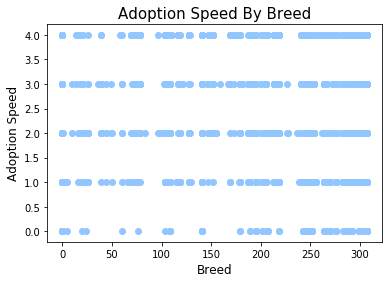

In [42]:
plt.scatter(df['breed2'], df['adoptionspeed'])
plt.title('Adoption Speed By Breed',fontsize=15)
plt.xlabel('Breed',fontsize=12)
plt.ylabel('Adoption Speed',fontsize=12)

The regression result shows this model using 'breed2' as the indepedent variable explains 0 of the dependent variable 'adoptionspeed' (R-squared = 0.000).

In [43]:
reg_gender = smf.ols('adoptionspeed ~ gender',data=df).fit()
print(reg_gender.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.84
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.74e-12
Time:                        14:10:58   Log-Likelihood:                -23672.
No. Observations:               14977   AIC:                         4.735e+04
Df Residuals:                   14975   BIC:                         4.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3396      0.027     87.243      0.0

The regression result shows this model using 'gender' as the indepedent variable only explains 0.3% of the dependent variable 'adoptionspeed' (R-squared = 0.003).

In [44]:
reg_maturitysize = smf.ols('adoptionspeed ~ maturitysize',data=df).fit()
print(reg_maturitysize.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     32.34
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.32e-08
Time:                        14:10:58   Log-Likelihood:                -23681.
No. Observations:               14977   AIC:                         4.737e+04
Df Residuals:                   14975   BIC:                         4.738e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3305      0.034     68.436   

The regression result shows this model using 'maturitysize' as the indepedent variable only explains 0.2% of the dependent variable 'adoptionspeed' (R-squared = 0.002).

In [45]:
reg_vaccinated = smf.ols('adoptionspeed ~ vaccinated',data=df).fit()
print(reg_vaccinated.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     53.56
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           2.64e-13
Time:                        14:10:58   Log-Likelihood:                -23671.
No. Observations:               14977   AIC:                         4.735e+04
Df Residuals:                   14975   BIC:                         4.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6986      0.027    101.095      0.0

Vaccinated (1 = Yes, 2 = No, 3 = Not Sure)

The regression result shows this model using 'vaccinated' as the indepedent variable only explains 0.3% of the dependent variable 'adoptionspeed' (R-squared = 0.003).

In [46]:
reg_health = smf.ols('adoptionspeed ~ health',data=df).fit()
print(reg_health.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.27
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           0.000462
Time:                        14:10:58   Log-Likelihood:                -23691.
No. Observations:               14977   AIC:                         4.739e+04
Df Residuals:                   14975   BIC:                         4.740e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3411      0.051     45.968      0.0

The regression result shows this model using 'health' as the indepedent variable only explains 0.1% of the dependent variable 'adoptionspeed' (R-squared = 0.001).

In [47]:
reg_videoamt = smf.ols('adoptionspeed ~ videoamt',data=df).fit()
print(reg_videoamt.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.004621
Date:                Fri, 05 Jul 2019   Prob (F-statistic):              0.946
Time:                        14:10:58   Log-Likelihood:                -23697.
No. Observations:               14977   AIC:                         4.740e+04
Df Residuals:                   14975   BIC:                         4.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5164      0.010    258.093      0.0

The regression result shows this model using 'videoamt' as the indepedent viarable explains 0.000 of the model and is not statistically signigicant.

In [48]:
reg_photoamt = smf.ols('adoptionspeed ~ photoamt',data=df).fit()
print(reg_photoamt.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.951
Date:                Fri, 05 Jul 2019   Prob (F-statistic):            0.00481
Time:                        14:10:58   Log-Likelihood:                -23693.
No. Observations:               14977   AIC:                         4.739e+04
Df Residuals:                   14975   BIC:                         4.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5466      0.014    176.752      0.0

Text(0, 0.5, 'Adoption Speed')

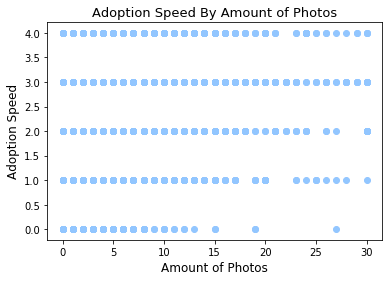

In [49]:
plt.scatter(df['photoamt'], df['adoptionspeed'])
plt.title('Adoption Speed By Amount of Photos',fontsize=13)
plt.xlabel('Amount of Photos',fontsize=12)
plt.ylabel('Adoption Speed',fontsize=12)

The regression result shows this model using 'photoamt' as the indepedent variable only explains 0.1% of the dependent variable 'adoptionspeed' (R-squared = 0.001).

In [50]:
reg_fee = smf.ols('adoptionspeed ~ fee',data=df).fit()
print(reg_fee.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2083
Date:                Fri, 05 Jul 2019   Prob (F-statistic):              0.648
Time:                        14:10:58   Log-Likelihood:                -23697.
No. Observations:               14977   AIC:                         4.740e+04
Df Residuals:                   14975   BIC:                         4.741e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5175      0.010    252.540      0.0

The regression result shows this model using 'fee' as the indepedent variable explains 0.000 of the model and is not statistically significant.

In [51]:
reg_quantity = smf.ols('adoptionspeed ~ quantity',data=df).fit()
print(reg_quantity.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     59.24
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.48e-14
Time:                        14:10:58   Log-Likelihood:                -23668.
No. Observations:               14977   AIC:                         4.734e+04
Df Residuals:                   14975   BIC:                         4.735e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4372      0.014    173.288      0.0

Text(0, 0.5, 'Adoption Speed')

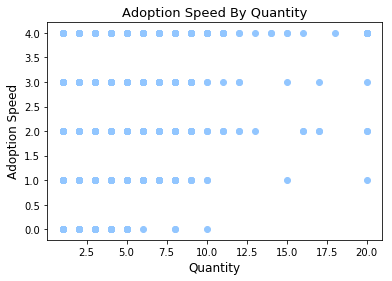

In [52]:
plt.scatter(df['quantity'], df['adoptionspeed'])
plt.title('Adoption Speed By Quantity',fontsize=13)
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Adoption Speed',fontsize=12)

The regression result shows this model using 'quantity' as the indepedent variable only explains 0.4% of the dependent variable 'adoptionspeed' (R-squared = 0.004).

In [53]:
df.columns

Index(['type', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2',
       'color3', 'maturitysize', 'furlength', 'vaccinated', 'dewormed',
       'sterilized', 'health', 'quantity', 'fee', 'state', 'rescuerid',
       'videoamt', 'description', 'petid', 'photoamt', 'adoptionspeed',
       'description_length', 'state_name', 'age_yr'],
      dtype='object')

In [54]:
reg_total = smf.ols('adoptionspeed ~ type + age + breed1 + gender + quantity + maturitysize + vaccinated + dewormed + sterilized + health + photoamt',data=df).fit()
print(reg_total.summary())

                            OLS Regression Results                            
Dep. Variable:          adoptionspeed   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     76.63
Date:                Fri, 05 Jul 2019   Prob (F-statistic):          8.32e-169
Time:                        14:10:59   Log-Likelihood:                -23287.
No. Observations:               14977   AIC:                         4.660e+04
Df Residuals:                   14965   BIC:                         4.669e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7848      0.093     19.293   

This reg_total model takes multiple independent variables which were tested to be statistically significant in impacting the dependent variable 'adoptionspeed'. 

This model explains 5.3% of the total variable in the independent variables, which is still a small amount. 

Based on the coefficient of each independent variable, dogs tend to be more likely to be adopted than cats, younger pets tend to be more likely to be adopted than older pets, and higher code primary breeds tend to be more likely to be adopted than lower code primary breeds.

<center><b><font size='5'color='red'>MACHINE LEARNING ALGORITHMS</font></b></center>
<br><br>

We then took our analysis a step beyond regression by assessing machine learning algorithms for pet predictions.

In [40]:
y,X = patsy.dmatrices('adoptionspeed ~ type + age + breed1 + gender + quantity + maturitysize + vaccinated + dewormed + sterilized + health + photoamt',
                      data=df)

In [41]:
reg().fit(X,y).score(X,y)

0.05332327228800893

In [116]:
cross_val_score(reg(),X,np.ravel(y),cv=5).mean()

0.05364888747525944

We found R squared for Multiple Linear Regression - 5.36%.

In [42]:
knn().fit(X,y).score(X,y)

0.30472111310440975

We found R Squared for K-Nearest Neighbors. (We are aware that the below score can be based on an overfitted KNN model)

To alleviate the overfitting problem, we used 5-fold cross validation to get a more realistic score. 

In [43]:
cross_val_score(knn(),X,np.ravel(y),cv=5).mean()

0.015921865420894642

When using cross validation, the result from the knn model is worse than the one from the regression model.

Thus, we try to find the optimized K value.

In [59]:
for i in range(1,200):
    print(i,cross_val_score(knn(i),X,np.ravel(y),cv=5).mean())

1 -0.6214057063532189
2 -0.20923041773963363
3 -0.08801622920708754
4 -0.025523826993453725
5 0.015921865420894642
6 0.03790874165342599
7 0.05009829955079057
8 0.06331616130137274
9 0.07141700594656217
10 0.07941288455201763
11 0.08544553418683645
12 0.09001386228372277
13 0.09230711556213685
14 0.09418064868487748
15 0.0960684604776973
16 0.0991058101507494
17 0.1014389061963675
18 0.10245635555220758
19 0.10332018484620105
20 0.10679298851858354
21 0.10667170182699515
22 0.10740552052542558
23 0.1102315655193015
24 0.11109406020565493
25 0.11166573894573098
26 0.11194193916787909
27 0.11297866089875001
28 0.11435264662108904
29 0.11536265185724022
30 0.11694407518449568
31 0.11614719854392445
32 0.11637698930912128
33 0.11546926452028838
34 0.11672187579209703
35 0.11915051297117363
36 0.1191304148394599
37 0.11979554891729108
38 0.1206003342551107
39 0.12023544329844053
40 0.12157847453095905
41 0.12070114740106655
42 0.1221155409468027
43 0.12223459817614832
44 0.12175388423923664

We found that n=68 neighbors is the optimal amount for our model. When k=68, R Squared is 0.1251420899487351, higher than the score from the Regression model.

Next, we found R Squared using a Random Forest model.

In [60]:
cross_val_score(rf(n_estimators=100),X,np.ravel(y),cv=5).mean()

0.031384833950204596

In [44]:
cross_val_score(rf(n_estimators=200),X,np.ravel(y),cv=5).mean()

0.03273916233891825

We tuned the parameters for our Random Forest analysis.

In [46]:
for i in range(6,15):
    print(i, cross_val_score(rf(n_estimators=200, max_depth = i),X,np.ravel(y),cv=5).mean())

6 0.14142104290300656
7 0.14369979802185048
8 0.14541075683458107
9 0.14558445915743295
10 0.1454277127702301
11 0.14210957966220802
12 0.13825738136387092
13 0.13160497482829078
14 0.12248142739292663


Now we have found the optimal max_depth (max_depth = 9), we will tune for max_features.

In [47]:
for i in range(4,10):
    print(i, cross_val_score(rf(n_estimators=200, max_depth = 9, max_features = i),X,np.ravel(y),cv=5).mean())

4 0.15319127331770724
5 0.15369130318740476
6 0.15250857881472452
7 0.15235347089213444
8 0.1505303384243229
9 0.15005347828748147


Now we have found the optimal hyperparameters and the resulted R Sqaured for the Random Forest model is 0.15369130318740476, highest among all models we have tried.

We also decided to test the model via classification, where we segmented the "y" into two categories - (1) a pet is adopted within 100 days (adoption speeds between 0 and 3), (2) a pet is not adopted (adoption speed 4).

We denoted "1" for a pet adopted within 100 days and '0' for a pet not adopted.

In [51]:
df['adoption_indicator'] = np.where(df['adoptionspeed']==4,0,1)

In [69]:
y,X = patsy.dmatrices('adoption_indicator ~ type + age + breed1 + gender + quantity + maturitysize + vaccinated + dewormed + sterilized + health + photoamt',
                      data=df)

In [70]:
y = np.ravel(y)

In [71]:
yhat = logistic().fit(X,y).predict(X)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
pd.Series(yhat).value_counts()

1.0    14456
0.0      521
dtype: int64

In [73]:
df['adoption_indicator'].value_counts()

1    10784
0     4193
Name: adoption_indicator, dtype: int64

In [74]:
df['yhat'] = logistic().fit(X,y).predict(X)
df.pivot_table(index='adoption_indicator',columns='yhat',values='rescuerid',aggfunc='count')/len(df)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


yhat,0.0,1.0
adoption_indicator,,
0,0.018028,0.261935
1,0.016759,0.703278


In [84]:
cross_val_score(logistic(),X,y,cv=5).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.7215070835067304

The "confusion matrix" above shows that the model correctly predicts adoption only 72% of the time, using a logistic regression. Cross validation using the regression classifier model also returns a similar result.

We then analyzed classification under k-nearest neighbors.

In [75]:
pd.Series(knnc().fit(X,y).predict(X)).value_counts()

1.0    12032
0.0     2945
dtype: int64

In [76]:
knnc().fit(X,y).score(X,y)

array(0.79915871)

The above result shows that a knn model returns a model with almost 80% accuracy. (We are aware that this model may have overfitting problems)

In [77]:
df['yhat_knn']=knnc().fit(X,y).predict(X)
df

,type,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,...,description,petid,photoamt,adoptionspeed,description_length,state_name,age_yr,adoption_indicator,yhat,yhat_knn
0,2.0,3,299,0,1.0,1,7,0,1,1,...,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2,359,Selangor,0.250000,1,1.0,1.0
1,2.0,1,265,0,1.0,1,2,0,2,2,...,I just found it alone yesterday near my apartm...,6296e909a,2,0,118,Kuala Lumpur,0.083333,1,1.0,1.0
2,1.0,1,307,0,1.0,2,7,0,2,2,...,Their pregnant mother was dumped by her irresp...,3422e4906,7,3,393,Selangor,0.083333,1,1.0,1.0
3,1.0,4,307,0,2.0,1,2,0,2,1,...,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2,146,Kuala Lumpur,0.333333,1,1.0,1.0
4,1.0,1,307,0,1.0,1,0,0,2,1,...,This handsome yet cute boy is up for adoption....,850a43f90,3,2,390,Selangor,0.083333,1,1.0,1.0
5,2.0,3,266,0,2.0,5,6,0,2,1,...,This is a stray kitten that came to my house. ...,d24c30b4b,2,2,87,Selangor,0.250000,1,1.0,1.0
6,2.0,12,264,264,1.0,1,0,0,2,3,...,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3,1,400,Selangor,1.000000,1,1.0,0.0
7,1.0,0,307,0,2.0,1,2,7,2,1,...,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9,3,109,Selangor,0.000000,1,1.0,1.0
8,2.0,2,265,0,2.0,6,0,0,2,2,...,"healthy and active, feisty kitten found in nei...",c06d167ca,6,1,79,Selangor,0.166667,1,1.0,1.0
9,2.0,12,265,0,2.0,1,7,0,2,2,...,"Very manja and gentle stray cat found, we woul...",7a0942d61,2,4,232,Selangor,1.000000,0,1.0,0.0


In [78]:
df.pivot_table(index='adoption_indicator',columns='yhat_knn',values='rescuerid',aggfunc='count')/len(df)

yhat_knn,0.0,1.0
adoption_indicator,,
0,0.137878,0.142085
1,0.058757,0.661281


The "confusion matrix" above shows that the model correctly predicts adoption 80% of the time. (We are aware that this model may have overfitting problems)

Now we wanted to tune for the optimal k value.

In [85]:
for i in range(50,70):
    print(i,cross_val_score(knnc(i),X,np.ravel(y),cv=5).mean())

50 0.7410027054055359
51 0.7424049536120936
52 0.7426053097909497
53 0.7428057552004107
54 0.7428057105627747
55 0.7420043080619441
56 0.742872421629149
57 0.742004151993998
58 0.7421380200713237
59 0.7430058438363436
60 0.7418039964313892
61 0.7415368845634116
62 0.7432729111113525
63 0.7432066236260692
64 0.7419376192101638
65 0.7433400235293348
66 0.742805844341681
67 0.7416708195227457
68 0.743072755593411
69 0.7419377753972229


After tuning the parameters, the model returns the best accuracy when n_neighbors = 65. The accuracy of the model is 0.7433400235293348.

We then analyzed classification under random forest.

In [113]:
yhat_rf = rfc().fit(X,y).predict(X)
df['yhat_rf']=rfc().fit(X,y).predict(X)
df.pivot_table(index='adoption_indicator',columns='yhat_rf',values='rescuerid',aggfunc='count')/len(df)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


yhat_rf,0.0,1.0
adoption_indicator,,
0,0.225212,0.054751
1,0.025239,0.694799


The "confusion matrix" above shows that the random forest classifier model correctly predicts adoption 95% of the time! 

However, the high accuracy can be due to overfitting. We then want to use cross validation to find out the realistic accuracy. 

In [86]:
cross_val_score(rfc(),X,y,cv=5).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

0.7163651799476595

The untuned random forest model returns an accuracy rate of 71.64%. 

Now we want to tune for the hyperparameters.

In [87]:
cross_val_score(rfc(n_estimators=100),X,np.ravel(y),cv=5).mean()

0.7268477158320794

In [88]:
cross_val_score(rfc(n_estimators=200),X,np.ravel(y),cv=5).mean()

0.7289846777323545

In [90]:
for i in range(10,20):
    print(i, cross_val_score(rfc(n_estimators=200, max_depth = i),X,np.ravel(y),cv=5).mean())

10 0.7534222482587587
11 0.7564931653116129
12 0.7555584743676049
13 0.7522867775250253
14 0.7522200886881341
15 0.747345720682356
16 0.7481468109728487
17 0.7444746694345932
18 0.7406683920527516
19 0.7375300951432157


In [92]:
for i in range(1,10):
    print(i, cross_val_score(rfc(n_estimators=200, max_depth = 11, max_features = i),X,np.ravel(y),cv=5).mean())

1 0.7454764280398343
2 0.7506849089012623
3 0.7547572056903481
4 0.7562932104248082
5 0.7552917861104967
6 0.7527543793507654
7 0.751753311780204
8 0.7531550917680342
9 0.7523538230312207


After tuning the parameters, the model returns the best accuracy when n_estimators=200, max_depth=11, and max_features = 4. The accuracy is 0.7564931653116129.

<center><b><font size='5'color='red'>CONCLUSION</font></b></center>
<br><br>

By tuning several machine learning models, we eventually landed on a model (random forest) that has 75.65% accuracy rate in predicting whether or not a pet will be adopted.